# Rose plots of PM2.5 vs wind direction.

In [1]:
using CSV
using DataFrames
using Dates
using Statistics
using GMT
using Plots

## LoRa-53

In [2]:
# Open combined dataFrames of PM data with weather data and select PM2.5 and wind data columns. 
df53 = CSV.read("/Users/prabu/Desktop/Joppa/ML_Data/match_df/L53_PM_weather.csv", DataFrame);
df = df53[:, ["v_comp_of_wind", "u_comp_of_wind", "IPS7100_pm2_5_mean"]];

# Removing empty raws.
df = df[completecases(df), :];

In [3]:
# Finding the clockwise angle of wind direction respect to positive Y axis.
# Angle is calculated in radius.

rows = []

for row in eachrow(df)
    speed = sqrt.(row.v_comp_of_wind.^2 + row.u_comp_of_wind.^2)
    ratio = (row.u_comp_of_wind)/speed
    
    if row.v_comp_of_wind >= 0       
        teta = acos(ratio)
    else
        teta = 6.286 - acos(ratio)
    end
    
    te = 7.857 - teta
    
    append!(rows, te)
end

In [4]:
rows = convert(Array{Float64}, rows)
df[!,:angle] = rows;
df.IPS7100_pm2_5_mean = convert(Array{Float64}, df.IPS7100_pm2_5_mean);

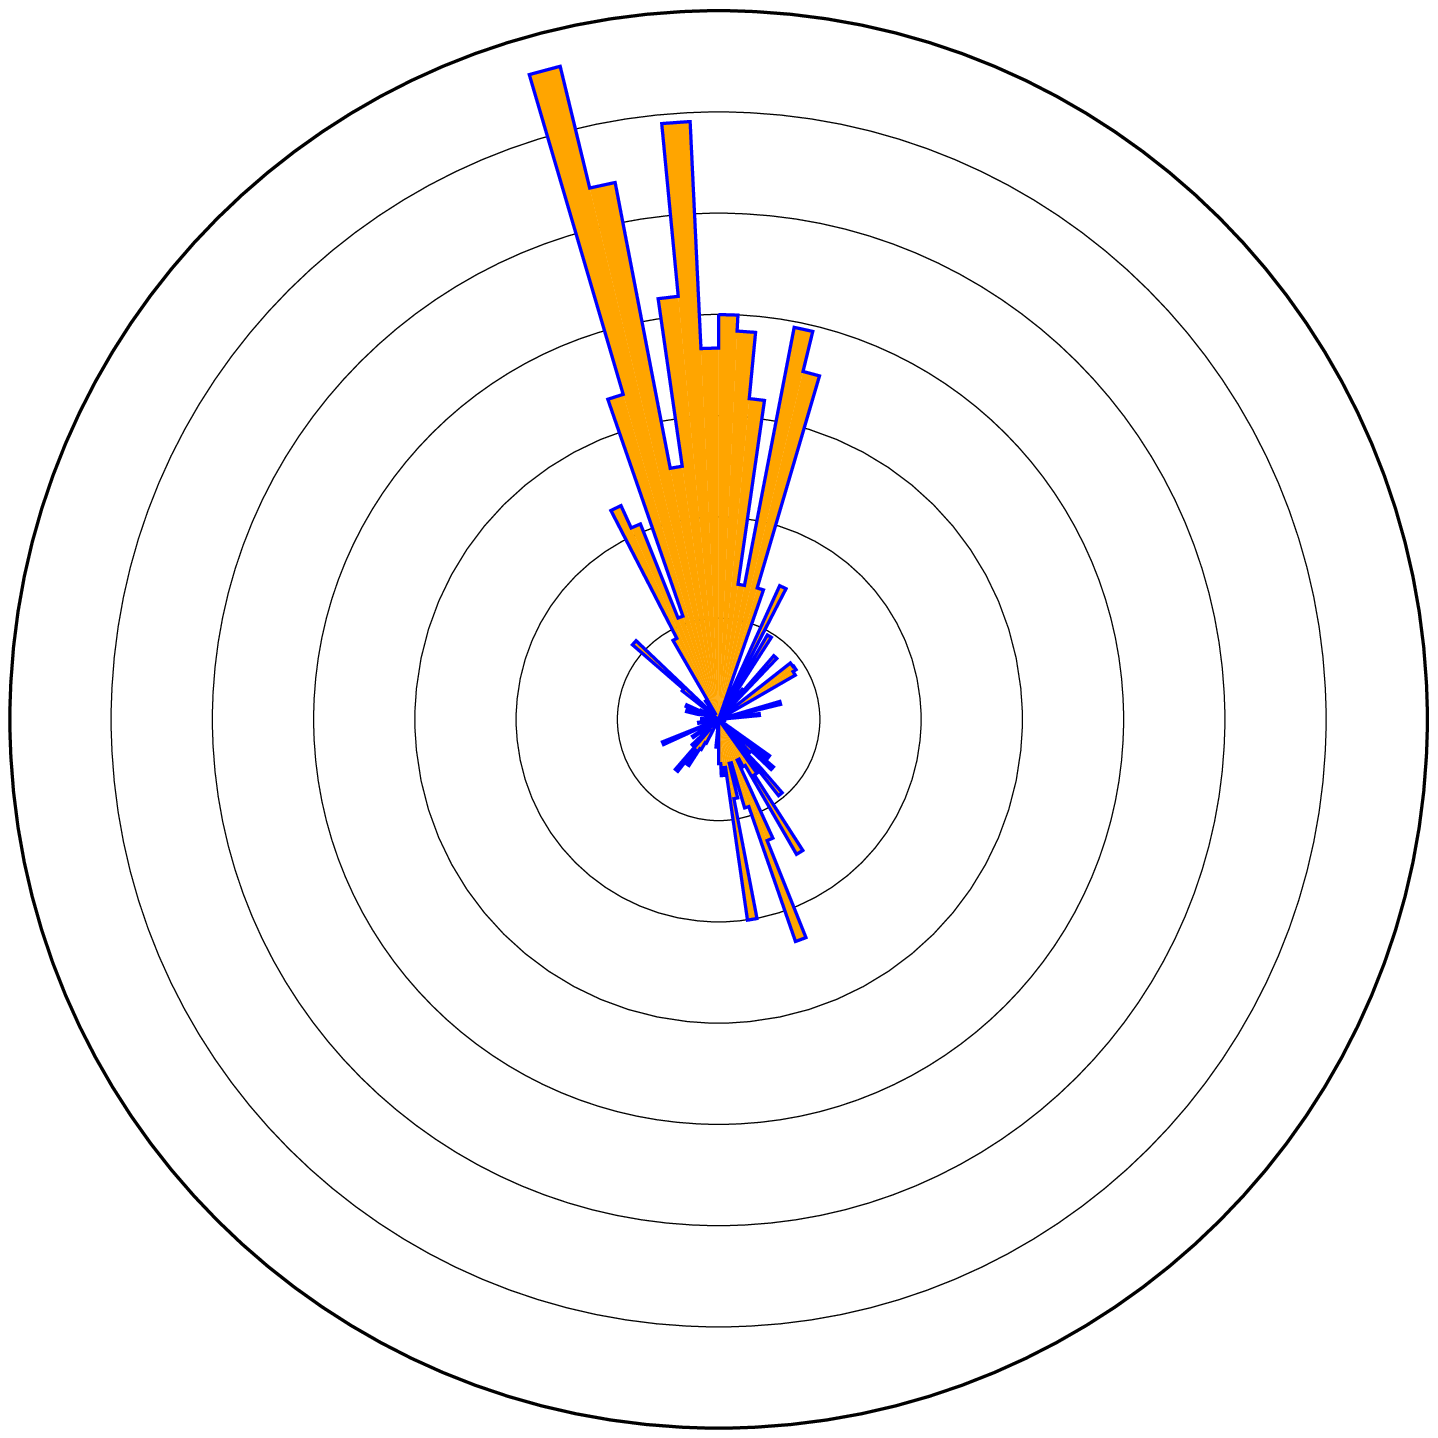

In [5]:
theta = df.angle
r = df.IPS7100_pm2_5_mean
rose([r theta.*180/π], region=[0 350 0 360], A=270/99, frame="xg50", L="0,90,180,270", pen=(:thin, :blue), 
    fill=:orange, show=true)

# LoRa54

In [6]:
df54 = CSV.read("/Users/prabu/Desktop/Joppa/ML_Data/match_df/L54_PM_weather.csv", DataFrame);
df = df54[:, ["v_comp_of_wind", "u_comp_of_wind", "IPS7100_pm2_5_mean"]];
df = df[completecases(df), :];

In [7]:
rows = []

for row in eachrow(df)
    speed = sqrt.(row.v_comp_of_wind.^2 + row.u_comp_of_wind.^2)
    ratio = (row.u_comp_of_wind)/speed
    
    if row.v_comp_of_wind >= 0       
        teta = acos(ratio)
    else
        teta = 6.286 - acos(ratio)
    end
    
    te = 7.857 - teta
    
    append!(rows, te)
end

In [8]:
rows = convert(Array{Float64}, rows)
df[!,:angle] = rows;
df.IPS7100_pm2_5_mean = convert(Array{Float64}, df.IPS7100_pm2_5_mean);

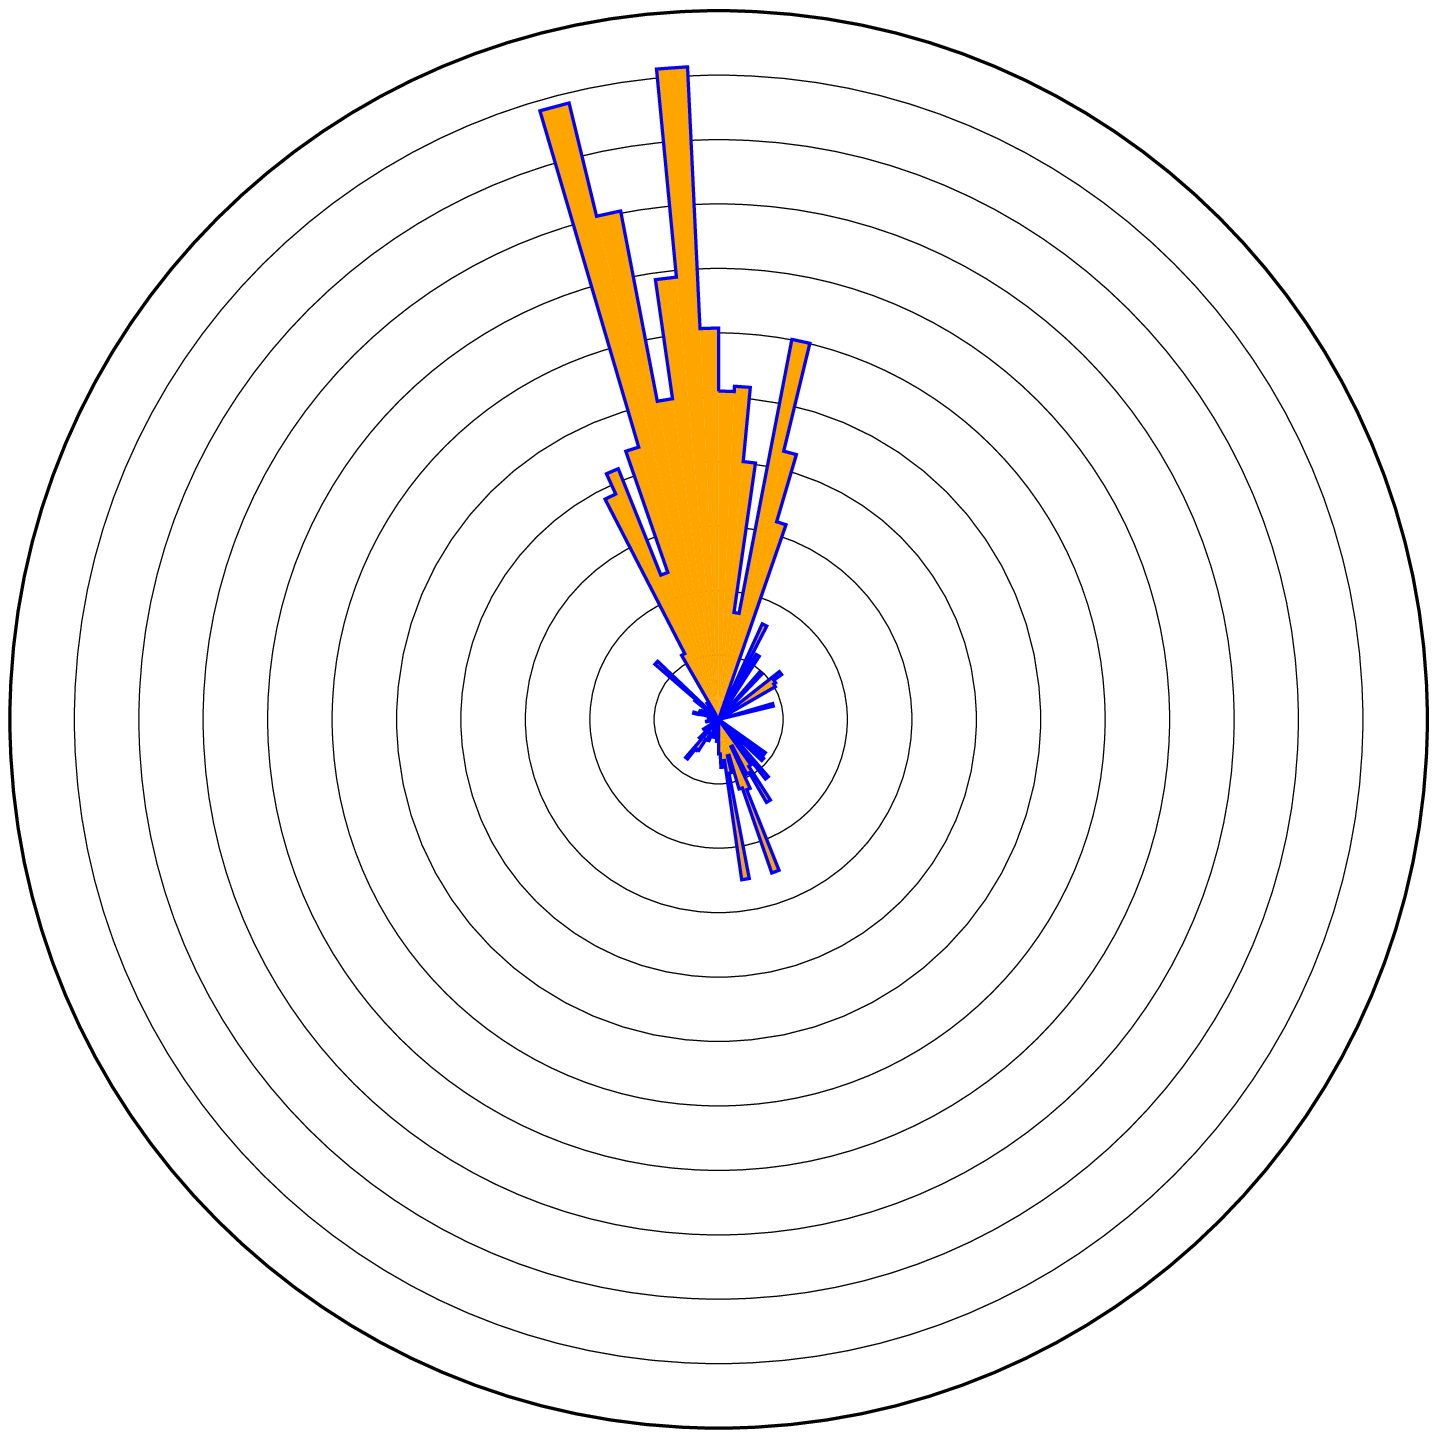

In [9]:
theta = df.angle
r = df.IPS7100_pm2_5_mean
rose([r theta.*180/π], region=[0 550 0 360], A=270/99, frame="xg50", L="0,90,180,270", pen=(:thin, :blue), 
    fill=:orange, show=true)

# Central Node

In [10]:
dfCent = CSV.read("/Users/prabu/Desktop/Joppa/ML_Data/match_df/Cent_PM_weather.csv", DataFrame);
df = dfCent[:, ["v_comp_of_wind", "u_comp_of_wind", "IPS7100_pm2_5_mean"]];
df = df[completecases(df), :];

In [11]:
rows = []

for row in eachrow(df)
    speed = sqrt.(row.v_comp_of_wind.^2 + row.u_comp_of_wind.^2)
    ratio = (row.u_comp_of_wind)/speed
    
    if row.v_comp_of_wind >= 0       
        teta = acos(ratio)
    else
        teta = 6.286 - acos(ratio)
    end
    
    te = 7.857 - teta
    
    append!(rows, te)
end

In [12]:
rows = convert(Array{Float64}, rows)
df[!,:angle] = rows;
df.IPS7100_pm2_5_mean = convert(Array{Float64}, df.IPS7100_pm2_5_mean);

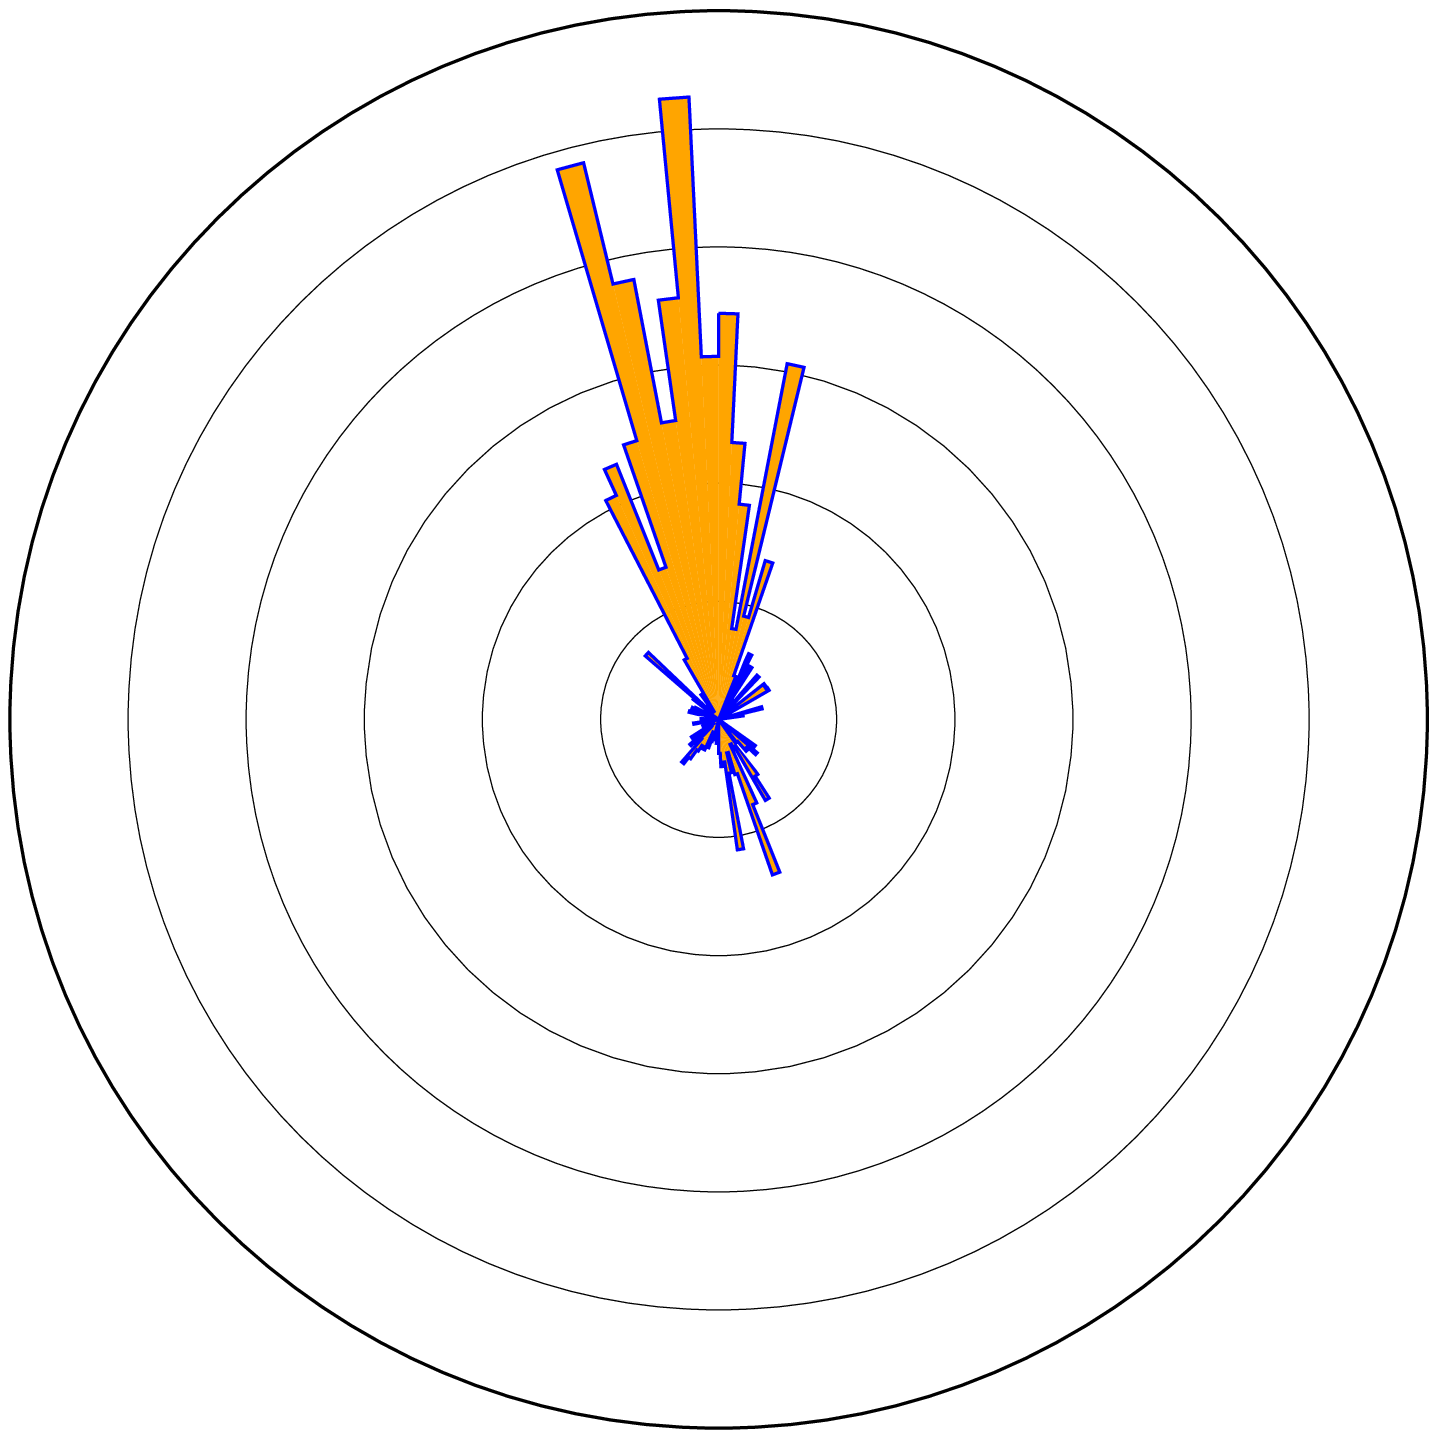

In [13]:
theta = df.angle
r = df.IPS7100_pm2_5_mean
rose([r theta.*180/π], region=[0 300 0 360], A=270/99, frame="xg50", L="0,90,180,270", pen=(:thin, :blue), 
    fill=:orange, show=true)